In [3]:
from mohan.Similarity import Similarity
#from mohan.ColavSimilarity import parse_doi, parse_string
from joblib import Parallel, delayed
import pickle
import numpy as np
#from mohan.ColavSimilarity import ColavSimilarity, parse_doi, parse_string
from elasticsearch import Elasticsearch, __version__ as es_version
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
s = Similarity("openalex_parsed",es_uri="172.19.31.8")

In [5]:
# open a file, where you stored the pickled data
file = open('dataset_full.pkl', 'rb')
# dump information to that file
data = pickle.load(file)
# close the file
file.close()

In [6]:

fns = []
fps = []

for i in range(100):
    if i%10 == 0:
        print(i)
    scopus = []
    np.random.shuffle(data["p"])
    np.random.shuffle(data["n"])
    for i in data["p"][0:3000]:
        scopus.append((i,True))
    for i in data["n"][0:3000]:
        scopus.append((i,False))
    np.random.shuffle(scopus) #shuffle is inplace
    results = Parallel(n_jobs=72,backend='threading',verbose=1)(delayed(s.search_work)(rec[0]['Title'],rec[0]['Source title'],rec[0]['Year'],
                     " ".join(rec[0]['Authors'].split(",")[0:5]), rec[0]['Volume'], rec[0]['Issue'], rec[0]['Page start'], rec[0]['Page end']) for rec in scopus)
                     #use_es_thold = False, es_thold_low = 0, es_thold_high = 180,#) for rec in scopus)
                     #ratio_thold = 90, partial_thold = 92, low_thold = 81) for rec in scopus)
    actual = []
    predicted = []
    for i in range(len(results)):
        actual.append(scopus[i][1])
        if results[i] is not None:
            predicted.append(True)
        else:
            predicted.append(False)
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    confusion_matrix = np.flip(confusion_matrix)
    fn = confusion_matrix[0][1]*100/(confusion_matrix[0][0]+confusion_matrix[0][1])
    fns.append(fn)
    fp = confusion_matrix[1][0]*100/(confusion_matrix[1][0]+confusion_matrix[1][1])
    fps.append(fp)

0


[Parallel(n_jobs=72)]: Using backend ThreadingBackend with 72 concurrent workers.
[Parallel(n_jobs=72)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=72)]: Done 306 tasks      | elapsed:    1.5s
[Parallel(n_jobs=72)]: Done 656 tasks      | elapsed:    3.1s
[Parallel(n_jobs=72)]: Done 1106 tasks      | elapsed:    5.3s
[Parallel(n_jobs=72)]: Done 1656 tasks      | elapsed:    7.9s
[Parallel(n_jobs=72)]: Done 2306 tasks      | elapsed:   11.0s
[Parallel(n_jobs=72)]: Done 3056 tasks      | elapsed:   14.4s
[Parallel(n_jobs=72)]: Done 3906 tasks      | elapsed:   18.4s
[Parallel(n_jobs=72)]: Done 4856 tasks      | elapsed:   22.9s
[Parallel(n_jobs=72)]: Done 6000 out of 6000 | elapsed:   28.3s finished
[Parallel(n_jobs=72)]: Using backend ThreadingBackend with 72 concurrent workers.
[Parallel(n_jobs=72)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=72)]: Done 306 tasks      | elapsed:    1.4s
[Parallel(n_jobs=72)]: Done 656 tasks      | elapsed:    3.1s
[Parallel(n_j

True

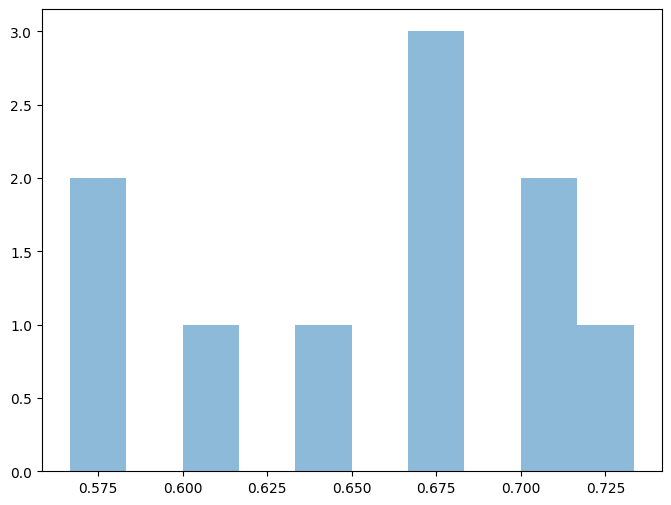

In [7]:
plt.figure(figsize=(8,6))
plt.hist(fns, bins=10, alpha=0.5, label="data1", density=False)
True

True

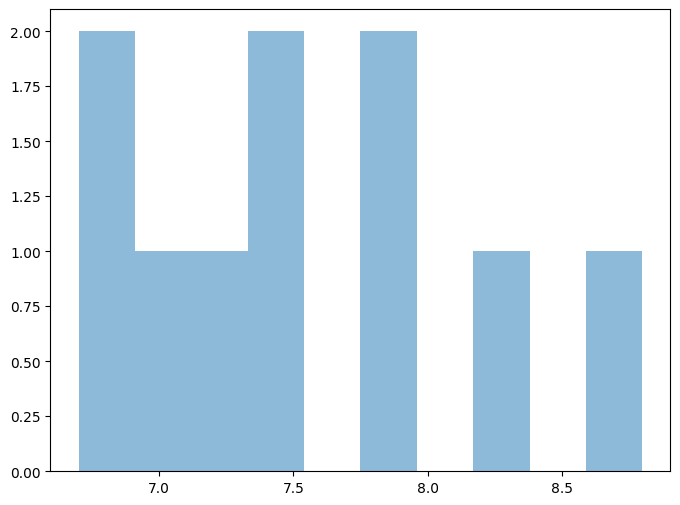

In [8]:
plt.figure(figsize=(8,6))
plt.hist(fps, bins=10, alpha=0.5, label="data1", density=False)
True

In [9]:
#0.71 no ES th
#0.69 boost 1 size =5
np.mean(fns)

0.6499999999999999

In [10]:
np.std(fns)

0.05426273532033234

In [11]:
np.mean(fps)

7.546666666666665

In [12]:
np.std(fps)

0.6139489663916159

In [ ]:
with open('similarity_fns_fps_noauthors_ratio_thold95.pkl', 'wb') as f:
    pickle.dump({"fns":fns,"fps":fps}, f)